# Visualizing Missing Data with `missmecha.visual`

This notebook demonstrates two complementary missing data visualization tools provided by `missmecha`:

- `plot_missing_matrix()`: A structural overview showing where missing values occur across rows and columns.
- `plot_missing_heatmap()`: A correlation-based heatmap that identifies whether variables tend to be missing together.

Both methods are useful for understanding data quality and assessing potential missing data mechanisms.


## Setup
Import required packages and the matrix visualization function.


In [3]:
import pandas as pd
import numpy as np

from missmecha.visual import plot_missing_matrix, plot_missing_heatmap

## Matrix Visualization

The `plot_missing_matrix()` function provides a binary heatmap where white areas indicate missing values and colored areas represent observed values.

It supports both:
- A simple fixed-color mode (`color=False`), which provides a clean view of the missingness structure.
- A colormap mode (`color=True`), which encodes the observed values using a color gradient to help identify potential relationships between value magnitude and missingness. This is particularly useful for assessing whether missingness might be systematic (e.g., related to unusually high or low values).

Below we demonstrate its use across different types of datasets.



### 1. Mixed-Type Data
This DataFrame includes datetime, categorical, and numerical columns with some missing values.

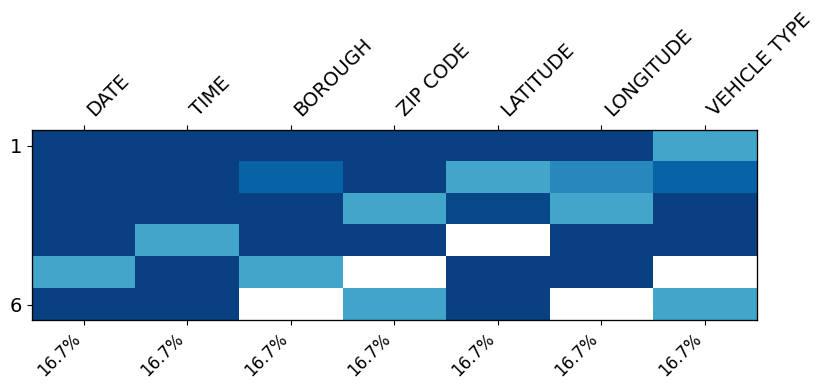

In [4]:
data_mixed = pd.DataFrame({
    "DATE": ["09/10/2016", "03/31/2016", "03/16/2016", "04/01/2016", np.nan, "04/03/2016"],
    "TIME": ["12:09:00", "22:10:00", "14:58:00", np.nan, "08:30:00", "19:00:00"],
    "BOROUGH": ["QUEENS", "BROOKLYN", "MANHATTAN", "QUEENS", "BRONX", np.nan],
    "ZIP CODE": ["11427", "11223", "10001", "11434", np.nan, "10010"],
    "LATITUDE": [40.724692, 40.598761, 40.712776, np.nan, 40.850000, 40.755000],
    "LONGITUDE": [-73.874245, -73.987843, -74.006058, -73.900000, -73.880000, np.nan],
    "VEHICLE TYPE": ["BICYCLE", "PASSENGER VEHICLE", "TAXI", "SUV", np.nan, "BICYCLE"]
})

plot_missing_matrix(data_mixed, cmap="GnBu")

### 2. Pure Numerical Data
Using a public dataset with numerical columns, sampled to 250 rows.

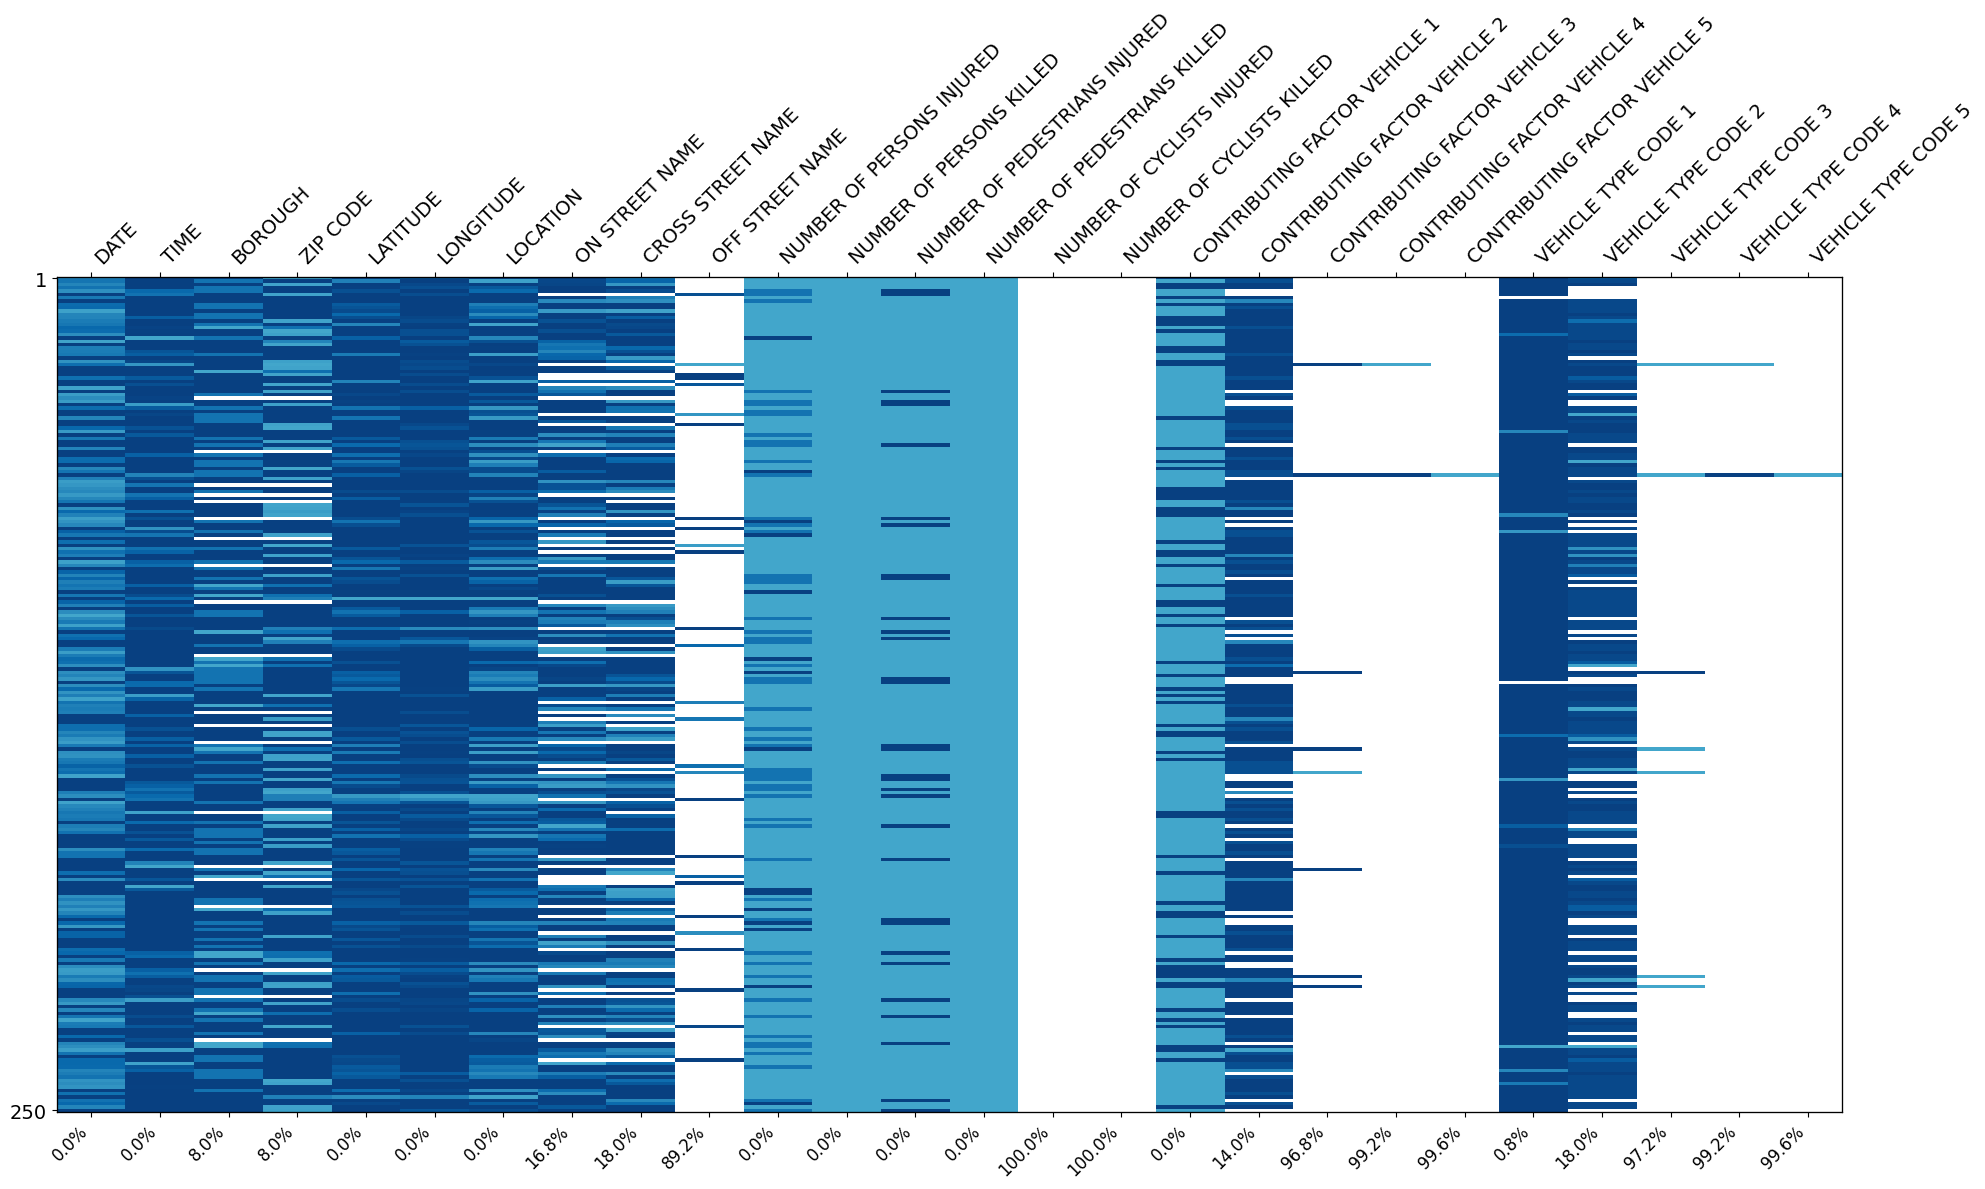

In [5]:
collisions = pd.read_csv(
    "https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv"
)
data_numeric = collisions.sample(250, random_state=42)

plot_missing_matrix(data_numeric, cmap="GnBu")

### 3. Time Series Data
A synthetic binary missingness pattern with a time-based index.

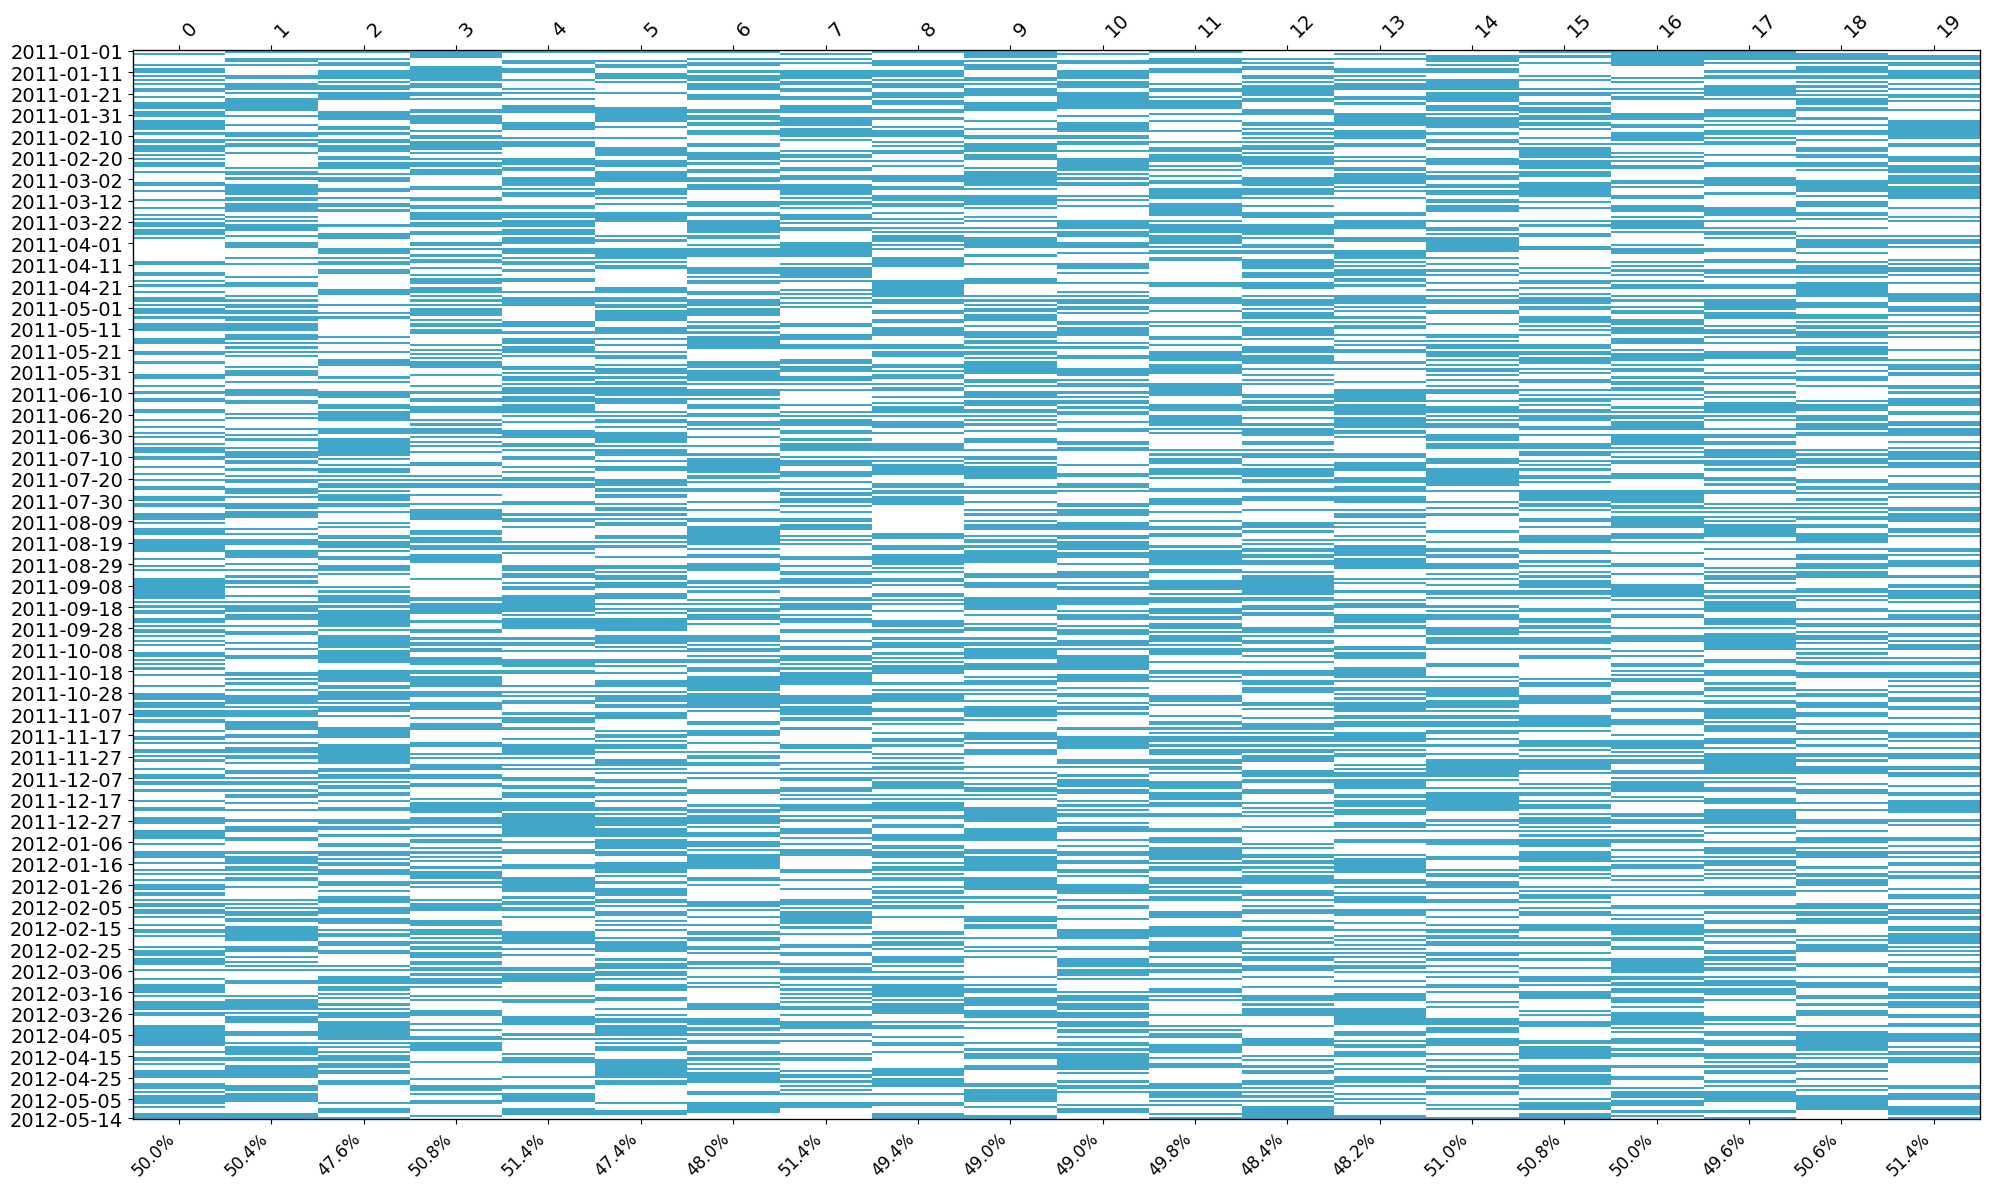

In [6]:
null_pattern = (np.random.random(10000).reshape((500, 20)) > 0.5).astype(bool)
null_df = pd.DataFrame(null_pattern).replace({False: None})

data_ts = null_df.set_index(pd.period_range('1/1/2011', periods=500, freq='D'))

plot_missing_matrix(data_ts, cmap="GnBu", ts=True)

### plot_missing_matrix() Parameters Overview

| Parameter        | Type            | Default     | Description |
|------------------|------------------|-------------|-------------|
| `df`             | DataFrame        | —           | Input data with missing values. |
| `cmap`           | str              | "RdBu"      | Colormap for value-based coloring. |
| `color`          | bool             | True        | Use colormap (`True`) or fixed color (`False`). |
| `fontsize`       | int              | 14          | Font size for axis tick labels. |
| `label_rotation` | int              | 45          | Rotation angle for column labels. |
| `ts`             | bool             | False       | Time series mode: show only first and last row labels. |
| `show_colorbar`  | bool             | False       | Whether to display a colorbar. |
| `figsize`        | tuple or None    | Auto        | Figure size. Auto-calculated if None. |



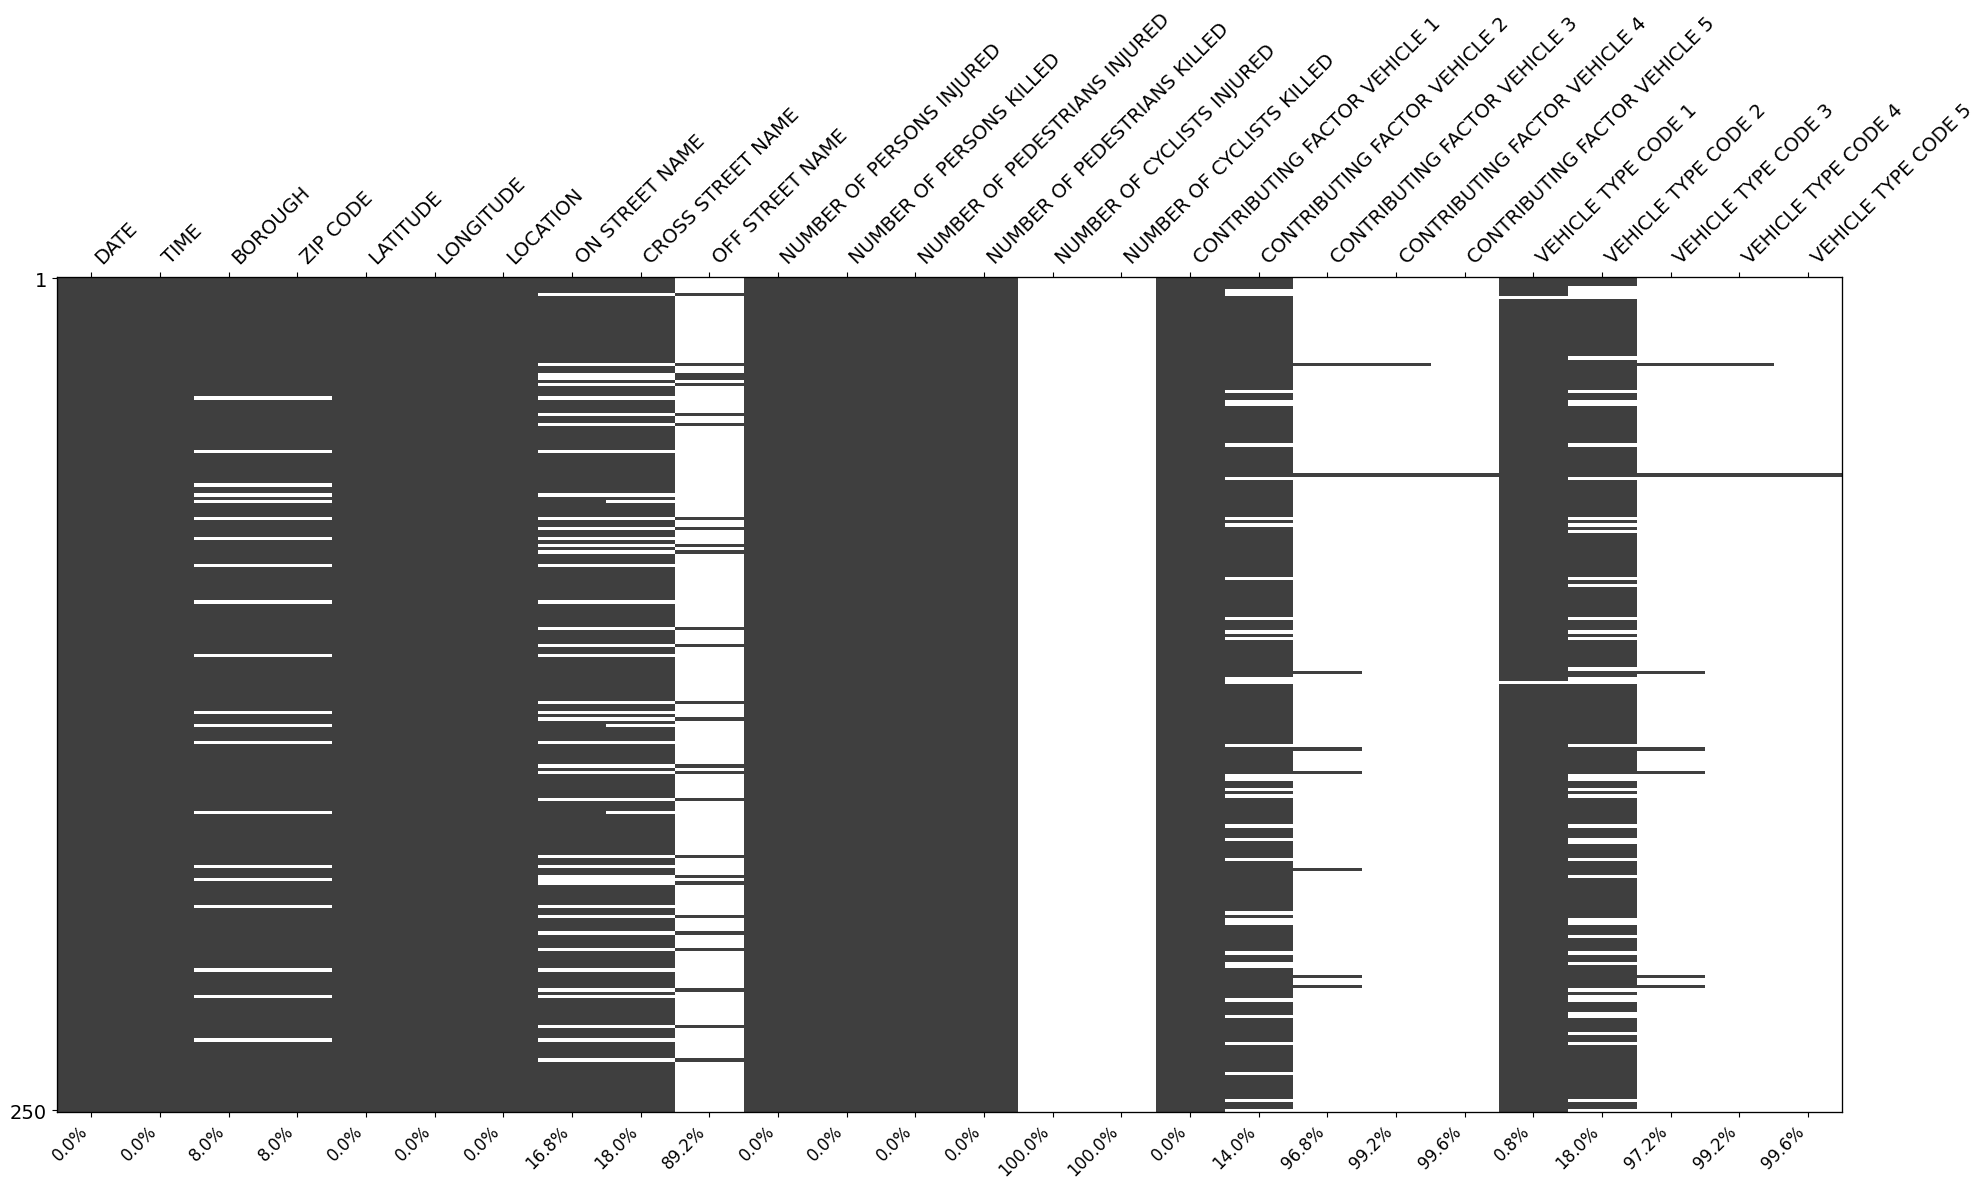

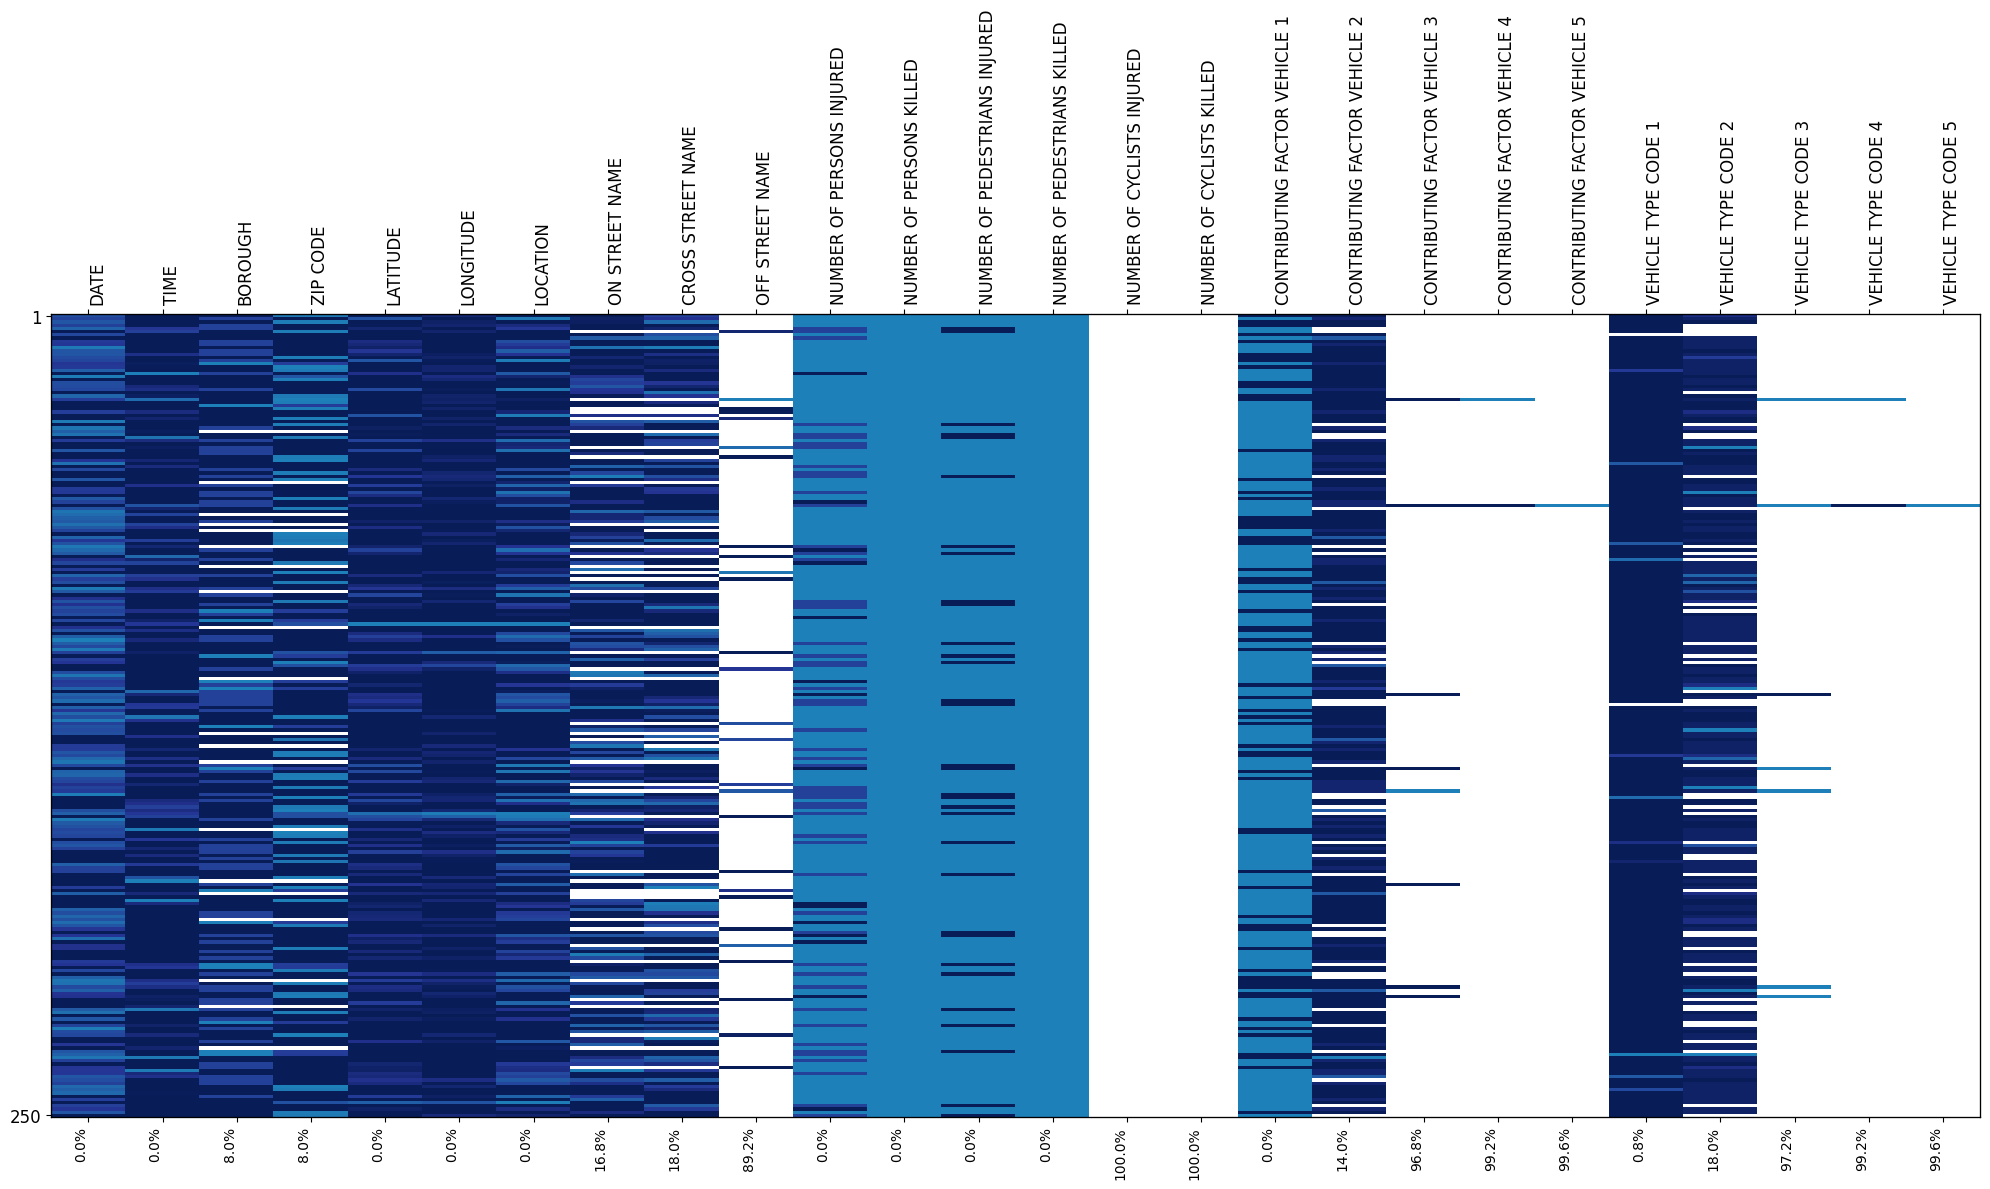

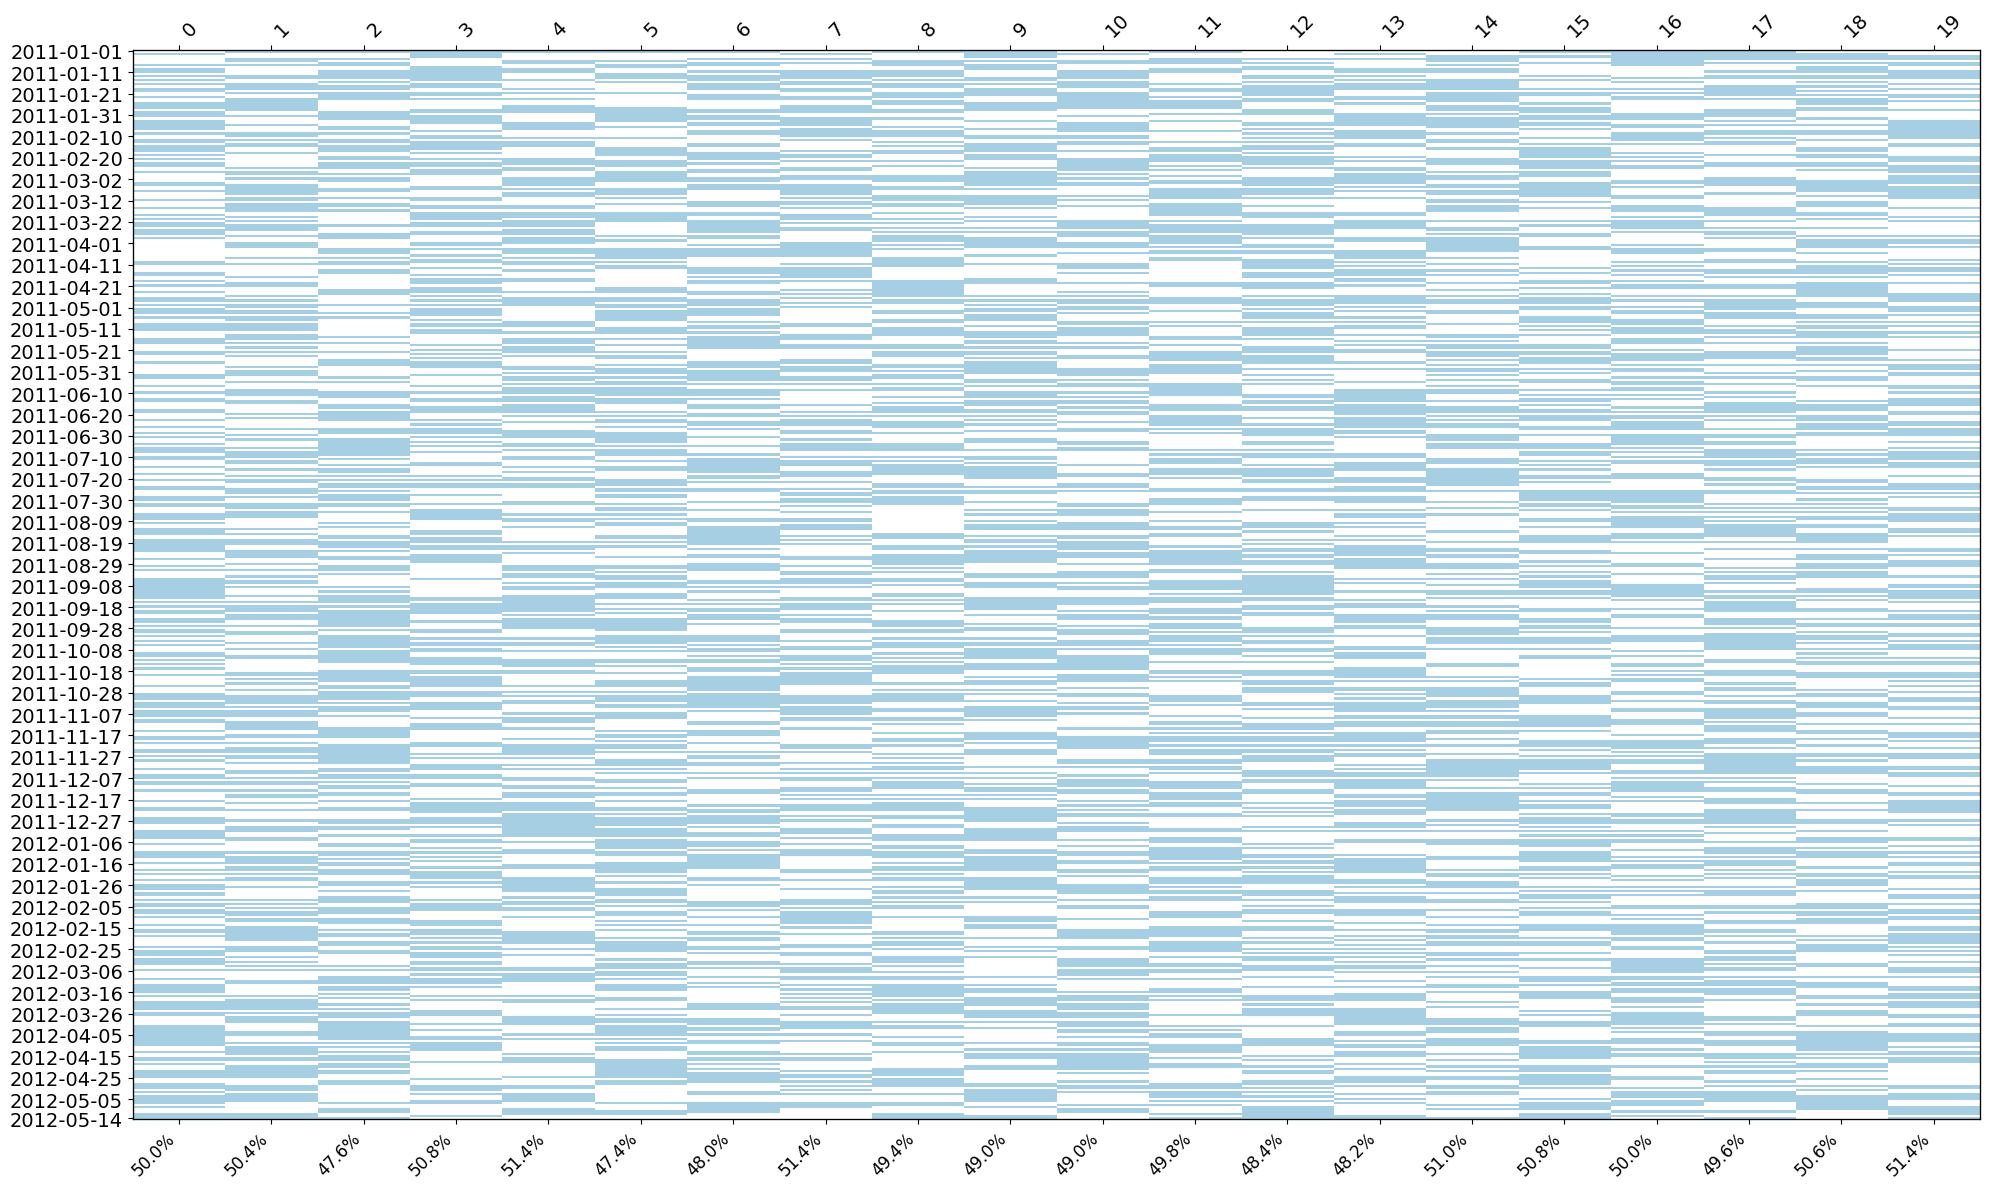

In [7]:
# Use a fixed gray color for present values
plot_missing_matrix(data_numeric, color=False)

# Custom colormap and label orientation
plot_missing_matrix(data_numeric, cmap="YlGnBu", label_rotation=90, fontsize=12)

# Time-series data, only show first/last row labels
plot_missing_matrix(data_ts, ts=True)


## Nullity Correlation Heatmap

The `plot_missing_heatmap()` function visualizes the correlation between missingness patterns across variables.

It helps identify whether some variables tend to be missing together. For example, if `VAR_A` is missing only when `VAR_B` is missing, this may suggest a structural dependency or a shared data entry issue. This function supports several correlation metrics: Pearson (default), Kendall, and Spearman.


### Heatmap on Mixed-Type Data

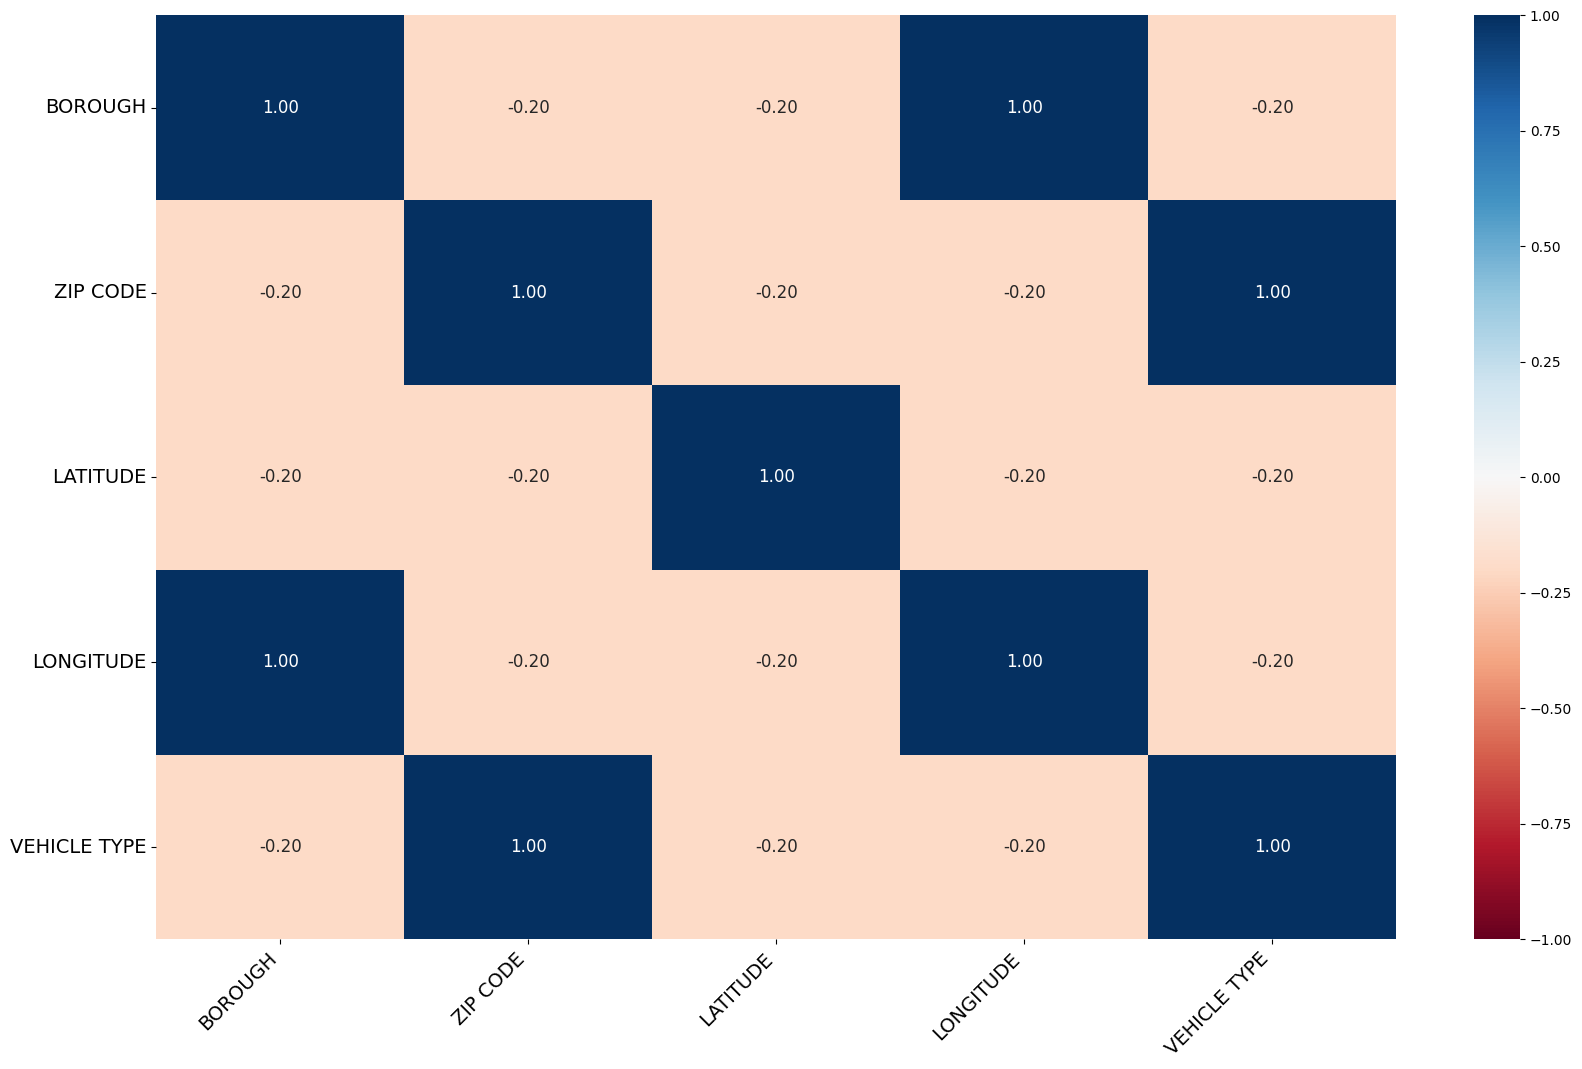

In [8]:
plot_missing_heatmap(data_mixed)

### Heatmap on Real-World Data

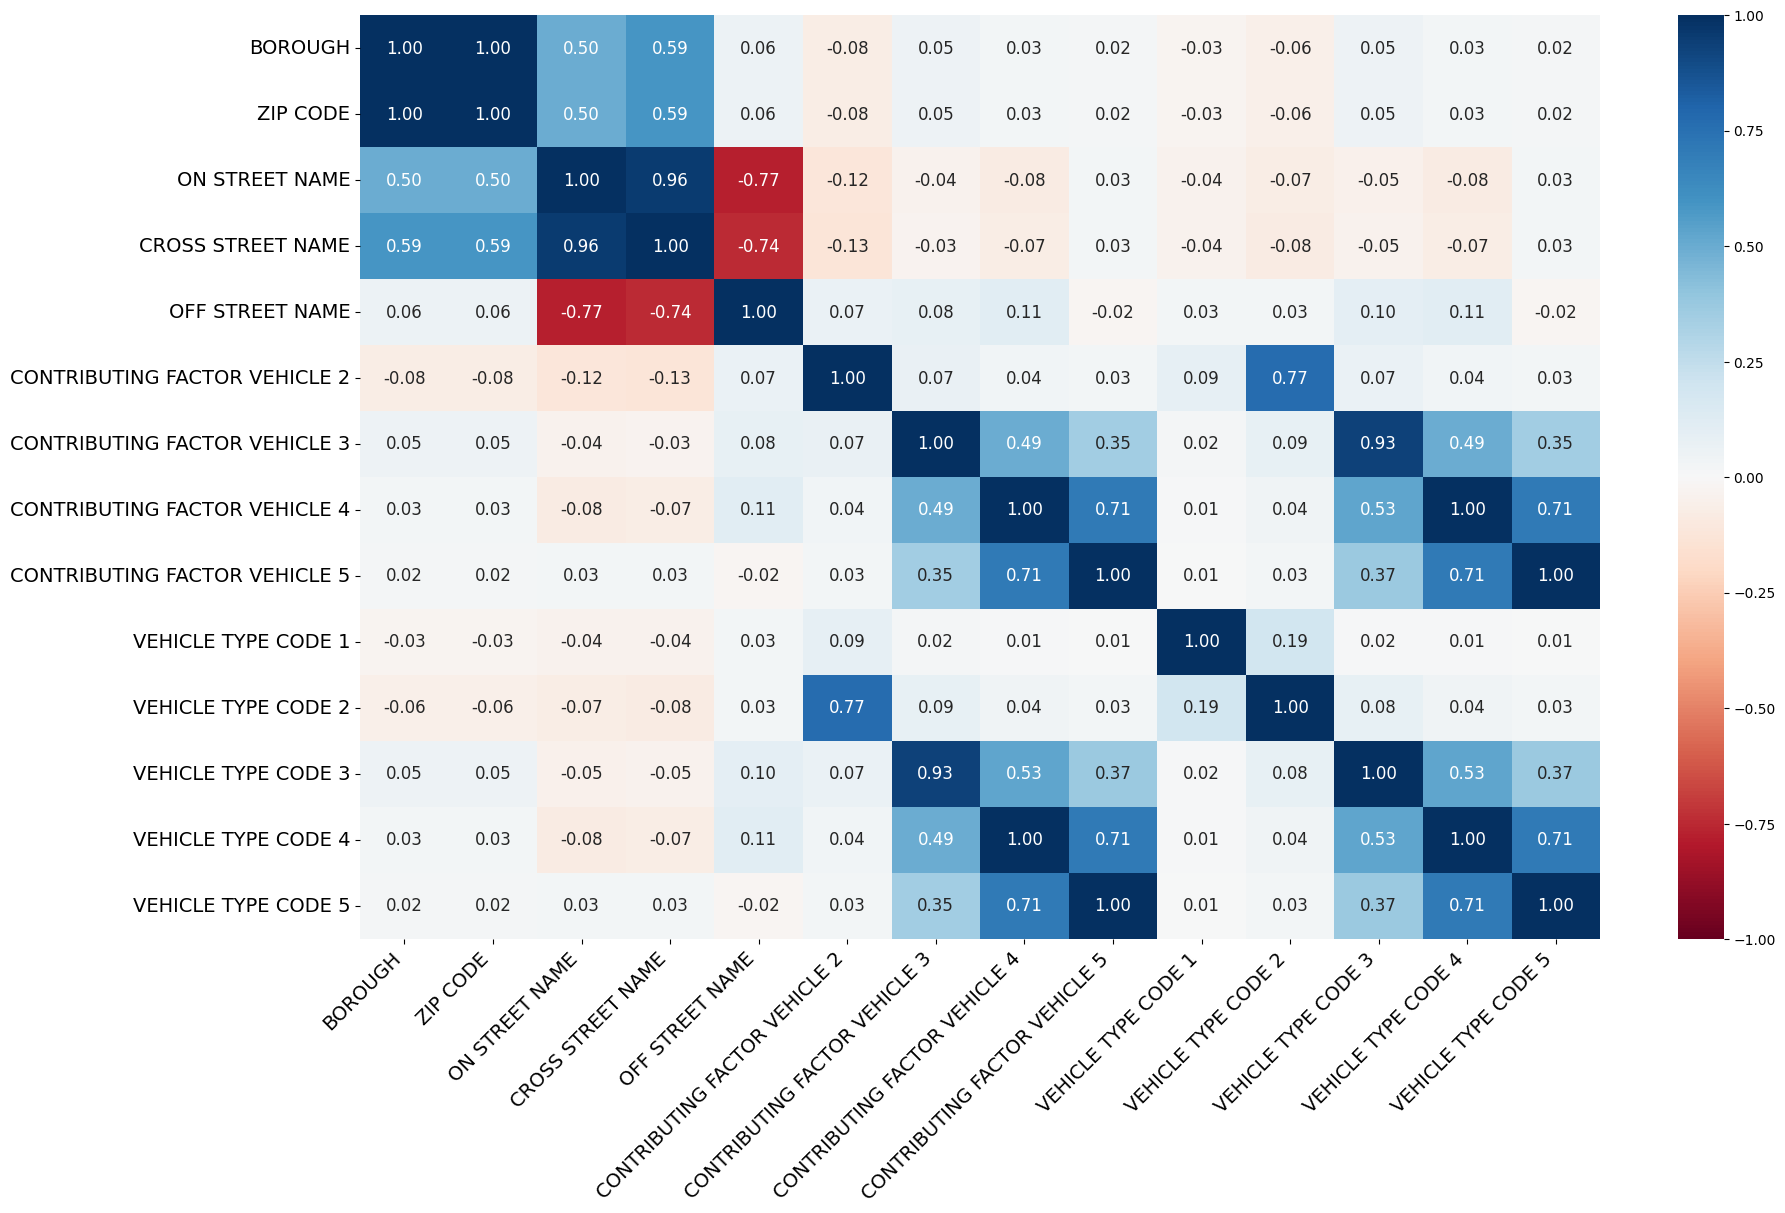

In [9]:
plot_missing_heatmap(data_numeric, method="kendall")